In [3]:
pip install pyspark

You should consider upgrading via the 'D:\Summer 2022\Machine Learning\Project\Project-Classifiaction\ML-project\Scripts\python.exe -m pip install --upgrade pip' command.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764027 sha256=4ef5424c42347438ebc1708930026429b8412c73823d3f64de711069cc121724
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1d\27\68\1382001655ef41217e1dd34d59aa777612135379bab64279e9
Successfully built pyspark
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764027 sha256=ca0aa8f0c87319eae70d627675d76668218291c1d3dbc8adc77f8c77ea92c00a
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1d\27\68\1382001655ef41217e1dd34d59aa777612135379bab64279e9
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Summer 2022\Machine Learning\Project\Project-Classifiaction\ML-project\Scripts\python.exe -m pip install --upgrade pip' command.


In [9]:
from pyspark.sql import SparkSession

In [10]:
spark = SparkSession.builder.appName("ml-cls").getOrCreate() 

In [6]:
df = spark.read.csv("./diabetes.csv",inferSchema=True, header = True)

In [12]:
df.printSchema()

root
 |-- preg: integer (nullable = true)
 |-- glucose: integer (nullable = true)
 |-- bp_diastolic: integer (nullable = true)
 |-- skin_triceps: integer (nullable = true)
 |-- insulin: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- pedigree: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- label: integer (nullable = true)



In [13]:
print((df.count(), len(df.columns)))

(768, 9)


In [14]:
df.filter(df.label==0).count()

500

In [15]:
from pyspark.sql.functions import isnull, when, count, col
df.select([count(when(isnull(c),c)).alias(c) for c in df.columns]).show()

+----+-------+------------+------------+-------+---+--------+---+-----+
|preg|glucose|bp_diastolic|skin_triceps|insulin|bmi|pedigree|age|label|
+----+-------+------------+------------+-------+---+--------+---+-----+
|   0|      0|           0|           0|      0|  0|       0|  0|    0|
+----+-------+------------+------------+-------+---+--------+---+-----+



In [11]:
pip install seaborn

You should consider upgrading via the 'd:\Summer 2022\Machine Learning\Project\Project-Classifiaction\ML-project\Scripts\python.exe -m pip install --upgrade pip' command.


In [16]:
import seaborn as sns

<AxesSubplot:>

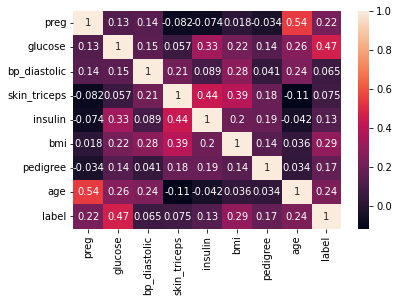

In [17]:
sns.heatmap(df.toPandas().corr(), annot = True)

In [18]:
df = df.drop('skin_triceps')
df = df.drop('bp_diastolic')
df.show(5)

+----+-------+-------+----+--------+---+-----+
|preg|glucose|insulin| bmi|pedigree|age|label|
+----+-------+-------+----+--------+---+-----+
|   6|    148|      0|33.6|   0.627| 50|    1|
|   1|     85|      0|26.6|   0.351| 31|    0|
|   8|    183|      0|23.3|   0.672| 32|    1|
|   1|     89|     94|28.1|   0.167| 21|    0|
|   0|    137|    168|43.1|   2.288| 33|    1|
+----+-------+-------+----+--------+---+-----+
only showing top 5 rows



In [15]:
x = df.drop('label')
x.show()

+----+-------+-------+----+--------+---+
|preg|glucose|insulin| bmi|pedigree|age|
+----+-------+-------+----+--------+---+
|   6|    148|      0|33.6|   0.627| 50|
|   1|     85|      0|26.6|   0.351| 31|
|   8|    183|      0|23.3|   0.672| 32|
|   1|     89|     94|28.1|   0.167| 21|
|   0|    137|    168|43.1|   2.288| 33|
|   5|    116|      0|25.6|   0.201| 30|
|   3|     78|     88|31.0|   0.248| 26|
|  10|    115|      0|35.3|   0.134| 29|
|   2|    197|    543|30.5|   0.158| 53|
|   8|    125|      0| 0.0|   0.232| 54|
|   4|    110|      0|37.6|   0.191| 30|
|  10|    168|      0|38.0|   0.537| 34|
|  10|    139|      0|27.1|   1.441| 57|
|   1|    189|    846|30.1|   0.398| 59|
|   5|    166|    175|25.8|   0.587| 51|
|   7|    100|      0|30.0|   0.484| 32|
|   0|    118|    230|45.8|   0.551| 31|
|   7|    107|      0|29.6|   0.254| 31|
|   1|    103|     83|43.3|   0.183| 33|
|   1|    115|     96|34.6|   0.529| 32|
+----+-------+-------+----+--------+---+
only showing top

In [16]:
from pyspark.ml.feature import VectorAssembler

In [17]:
assembler = VectorAssembler(inputCols=x.columns, outputCol='features')
transformed_data = assembler.transform(df)
transformed_data.show(truncate=False)

+----+-------+-------+----+--------+---+-----+---------------------------------+
|preg|glucose|insulin|bmi |pedigree|age|label|features                         |
+----+-------+-------+----+--------+---+-----+---------------------------------+
|6   |148    |0      |33.6|0.627   |50 |1    |[6.0,148.0,0.0,33.6,0.627,50.0]  |
|1   |85     |0      |26.6|0.351   |31 |0    |[1.0,85.0,0.0,26.6,0.351,31.0]   |
|8   |183    |0      |23.3|0.672   |32 |1    |[8.0,183.0,0.0,23.3,0.672,32.0]  |
|1   |89     |94     |28.1|0.167   |21 |0    |[1.0,89.0,94.0,28.1,0.167,21.0]  |
|0   |137    |168    |43.1|2.288   |33 |1    |[0.0,137.0,168.0,43.1,2.288,33.0]|
|5   |116    |0      |25.6|0.201   |30 |0    |[5.0,116.0,0.0,25.6,0.201,30.0]  |
|3   |78     |88     |31.0|0.248   |26 |1    |[3.0,78.0,88.0,31.0,0.248,26.0]  |
|10  |115    |0      |35.3|0.134   |29 |0    |[10.0,115.0,0.0,35.3,0.134,29.0] |
|2   |197    |543    |30.5|0.158   |53 |1    |[2.0,197.0,543.0,30.5,0.158,53.0]|
|8   |125    |0      |0.0 |0

In [18]:
#split the data
(x_train,x_test) = transformed_data.randomSplit([0.8,0.2])

In [19]:
from pyspark.ml.classification import DecisionTreeClassifier
clf = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3 )

In [20]:
model = clf.fit(x_train)

In [21]:
predictions = model.transform(x_test)
predictions.select('glucose', 'insulin', 'bmi', 'pedigree', 'age', 'label', 'prediction').show(5)

+-------+-------+----+--------+---+-----+----------+
|glucose|insulin| bmi|pedigree|age|label|prediction|
+-------+-------+----+--------+---+-----+----------+
|     74|     36|27.8|   0.269| 22|    0|       0.0|
|     84|     66|35.8|   0.545| 21|    0|       0.0|
|     86|      0|35.8|   0.238| 25|    0|       0.0|
|     91|      0|32.4|   0.601| 27|    0|       0.0|
|     94|      0| 0.0|   0.256| 25|    0|       0.0|
+-------+-------+----+--------+---+-----+----------+
only showing top 5 rows



In [22]:
predictions.select('glucose', 'insulin', 'bmi', 'pedigree', 'age', 'label', 'prediction').show()

+-------+-------+----+--------+---+-----+----------+
|glucose|insulin| bmi|pedigree|age|label|prediction|
+-------+-------+----+--------+---+-----+----------+
|     74|     36|27.8|   0.269| 22|    0|       0.0|
|     84|     66|35.8|   0.545| 21|    0|       0.0|
|     86|      0|35.8|   0.238| 25|    0|       0.0|
|     91|      0|32.4|   0.601| 27|    0|       0.0|
|     94|      0| 0.0|   0.256| 25|    0|       0.0|
|     99|      0|25.0|   0.253| 22|    0|       0.0|
|    101|      0|21.0|   0.252| 21|    0|       0.0|
|    101|      0|35.7|   0.198| 26|    0|       0.0|
|    102|     78|40.6|   0.496| 21|    0|       0.0|
|    104|     64|33.6|    0.51| 22|    1|       0.0|
|    104|    116|27.8|   0.454| 23|    0|       0.0|
|    107|      0|45.3|   0.686| 24|    0|       0.0|
|    107|     74|36.6|   0.757| 25|    1|       0.0|
|    109|      0|32.5|   0.855| 38|    1|       0.0|
|    111|      0|24.6|    0.66| 31|    0|       0.0|
|    114|    285|44.2|   0.167| 27|    0|     

In [23]:
predictions.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   26|
|    0|       0.0|   91|
|    1|       1.0|   21|
|    0|       1.0|   11|
+-----+----------+-----+



In [24]:
# calculate the elements of the confusion matrix
TN = predictions.filter('prediction = 0 AND label = prediction').count()
TP = predictions.filter('prediction = 1 AND label = prediction').count()
FN = predictions.filter('prediction = 0 AND label <> prediction').count()
FP = predictions.filter('prediction = 1 AND label <> prediction').count()

In [25]:
accuracy = (TN + TP) / (TN + TP + FN +FP)
precision = TP / (TP + FP)
recall = TP/ (TP + FN)

print('n accuracy: %0.3f' % accuracy)
print('n precision: %0.3f' % precision)
print('n recall: %0.3f' % recall)

n accuracy: 0.752
n precision: 0.656
n recall: 0.447


In [26]:
from pyspark.ml.classification import LogisticRegression
clf = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter = 10 )


In [27]:
model = clf.fit(x_train)

In [28]:
predictions = model.transform(x_test)
predictions.select('glucose', 'insulin', 'bmi', 'pedigree', 'age', 'label', 'prediction').show(5)

+-------+-------+----+--------+---+-----+----------+
|glucose|insulin| bmi|pedigree|age|label|prediction|
+-------+-------+----+--------+---+-----+----------+
|     74|     36|27.8|   0.269| 22|    0|       0.0|
|     84|     66|35.8|   0.545| 21|    0|       0.0|
|     86|      0|35.8|   0.238| 25|    0|       0.0|
|     91|      0|32.4|   0.601| 27|    0|       0.0|
|     94|      0| 0.0|   0.256| 25|    0|       0.0|
+-------+-------+----+--------+---+-----+----------+
only showing top 5 rows



In [29]:
predictions.select('glucose', 'insulin', 'bmi', 'pedigree', 'age', 'label', 'prediction').show()

+-------+-------+----+--------+---+-----+----------+
|glucose|insulin| bmi|pedigree|age|label|prediction|
+-------+-------+----+--------+---+-----+----------+
|     74|     36|27.8|   0.269| 22|    0|       0.0|
|     84|     66|35.8|   0.545| 21|    0|       0.0|
|     86|      0|35.8|   0.238| 25|    0|       0.0|
|     91|      0|32.4|   0.601| 27|    0|       0.0|
|     94|      0| 0.0|   0.256| 25|    0|       0.0|
|     99|      0|25.0|   0.253| 22|    0|       0.0|
|    101|      0|21.0|   0.252| 21|    0|       0.0|
|    101|      0|35.7|   0.198| 26|    0|       0.0|
|    102|     78|40.6|   0.496| 21|    0|       0.0|
|    104|     64|33.6|    0.51| 22|    1|       0.0|
|    104|    116|27.8|   0.454| 23|    0|       0.0|
|    107|      0|45.3|   0.686| 24|    0|       0.0|
|    107|     74|36.6|   0.757| 25|    1|       0.0|
|    109|      0|32.5|   0.855| 38|    1|       0.0|
|    111|      0|24.6|    0.66| 31|    0|       0.0|
|    114|    285|44.2|   0.167| 27|    0|     

In [30]:
predictions.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   23|
|    0|       0.0|   90|
|    1|       1.0|   24|
|    0|       1.0|   12|
+-----+----------+-----+



In [31]:
# calculate the elements of the confusion matrix
TN = predictions.filter('prediction = 0 AND label = prediction').count()
TP = predictions.filter('prediction = 1 AND label = prediction').count()
FN = predictions.filter('prediction = 0 AND label <> prediction').count()
FP = predictions.filter('prediction = 1 AND label <> prediction').count()

In [32]:
accuracy_Logistic = (TN + TP) / (TN + TP + FN +FP)
precision_Logistic = TP / (TP + FP)
recall_Logistic = TP/ (TP + FN)

print('n accuracy: %0.3f' % accuracy_Logistic)
print('n precision: %0.3f' % precision_Logistic)
print('n recall: %0.3f' % recall_Logistic)

n accuracy: 0.765
n precision: 0.667
n recall: 0.511


In [33]:
from pyspark.ml.classification import RandomForestClassifier
clf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 5 )

In [34]:
model = clf.fit(x_train)

In [35]:
predictions = model.transform(x_test)
predictions.select('glucose', 'insulin', 'bmi', 'pedigree', 'age', 'label', 'prediction').show(5)

+-------+-------+----+--------+---+-----+----------+
|glucose|insulin| bmi|pedigree|age|label|prediction|
+-------+-------+----+--------+---+-----+----------+
|     74|     36|27.8|   0.269| 22|    0|       0.0|
|     84|     66|35.8|   0.545| 21|    0|       0.0|
|     86|      0|35.8|   0.238| 25|    0|       0.0|
|     91|      0|32.4|   0.601| 27|    0|       0.0|
|     94|      0| 0.0|   0.256| 25|    0|       0.0|
+-------+-------+----+--------+---+-----+----------+
only showing top 5 rows



In [36]:
predictions.select('glucose', 'insulin', 'bmi', 'pedigree', 'age', 'label', 'prediction').show()

+-------+-------+----+--------+---+-----+----------+
|glucose|insulin| bmi|pedigree|age|label|prediction|
+-------+-------+----+--------+---+-----+----------+
|     74|     36|27.8|   0.269| 22|    0|       0.0|
|     84|     66|35.8|   0.545| 21|    0|       0.0|
|     86|      0|35.8|   0.238| 25|    0|       0.0|
|     91|      0|32.4|   0.601| 27|    0|       0.0|
|     94|      0| 0.0|   0.256| 25|    0|       0.0|
|     99|      0|25.0|   0.253| 22|    0|       0.0|
|    101|      0|21.0|   0.252| 21|    0|       0.0|
|    101|      0|35.7|   0.198| 26|    0|       0.0|
|    102|     78|40.6|   0.496| 21|    0|       0.0|
|    104|     64|33.6|    0.51| 22|    1|       0.0|
|    104|    116|27.8|   0.454| 23|    0|       0.0|
|    107|      0|45.3|   0.686| 24|    0|       0.0|
|    107|     74|36.6|   0.757| 25|    1|       0.0|
|    109|      0|32.5|   0.855| 38|    1|       0.0|
|    111|      0|24.6|    0.66| 31|    0|       0.0|
|    114|    285|44.2|   0.167| 27|    0|     

In [37]:
predictions.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   22|
|    0|       0.0|   90|
|    1|       1.0|   25|
|    0|       1.0|   12|
+-----+----------+-----+



In [38]:
# calculate the elements of the confusion matrix
TN = predictions.filter('prediction = 0 AND label = prediction').count()
TP = predictions.filter('prediction = 1 AND label = prediction').count()
FN = predictions.filter('prediction = 0 AND label <> prediction').count()
FP = predictions.filter('prediction = 1 AND label <> prediction').count()

In [39]:
accuracy_RandomForestClassifier = (TN + TP) / (TN + TP + FN +FP)
precision_RandomForestClassifier = TP / (TP + FP)
recall_RandomForestClassifier = TP/ (TP + FN)

print('n accuracy: %0.3f' % accuracy_RandomForestClassifier)
print('n precision: %0.3f' % precision_RandomForestClassifier)
print('n recall: %0.3f' % recall_RandomForestClassifier)

n accuracy: 0.772
n precision: 0.676
n recall: 0.532


In [40]:
print("LogisticRegression")
print('n accuracy: %0.3f' % accuracy_Logistic)
print('n precision: %0.3f' % precision_Logistic)
print('n recall: %0.3f' % recall_Logistic)
print('------------------------------------')
print("DecisionTree")
print('n accuracy: %0.3f' % accuracy)
print('n precision: %0.3f' % precision)
print('n recall: %0.3f' % recall)
print('------------------------------------')
print("RandomForest")
print('n accuracy: %0.3f' % accuracy_RandomForestClassifier)
print('n precision: %0.3f' % precision_RandomForestClassifier)
print('n recall: %0.3f' % recall_RandomForestClassifier)

LogisticRegression
n accuracy: 0.765
n precision: 0.667
n recall: 0.511
------------------------------------
DecisionTree
n accuracy: 0.752
n precision: 0.656
n recall: 0.447
------------------------------------
RandomForest
n accuracy: 0.772
n precision: 0.676
n recall: 0.532


: 

In [2]:
pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Summer 2022\Machine Learning\Project\Project-Classifiaction\ML-project\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [19]:
url = "D:\Summer 2022\Machine Learning\Project\Project-Classifiaction\diabetes.csv"

dataset = pd.read_csv(url)

In [20]:
dataset.head()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83 13]
 [26 32]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        96
           1       0.71      0.55      0.62        58

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

